# Univariable Selection

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = pd.read_csv(r"D:\corona\feature_selection\train.csv")

X = data.iloc[:,0:20]          # Independent Variables
y = data.iloc[:,1]             # Dependent Variable      ==> Price range

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
# Apply SelectKBest Class to extract top 10 best features

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)

In [3]:
dfscore = pd.DataFrame(fit.scores_)  # cal score with respect to chi-square test value
dfcolumn = pd.DataFrame(X.columns)

In [4]:
# Concat 2 DataFrame for better visualization

feature_score = pd.concat([dfcolumn, dfscore],axis=1)
feature_score.columns = ['Specs','Score']         # Naming the DataFame Columns

In [5]:
feature_score

,Specs,Score
0,battery_power,39.454523
1,blue,1010.000000
2,clock_speed,0.401141
3,dual_sim,1.215368
4,fc,0.112880
5,four_g,0.172946
6,int_memory,34.825177
7,m_dep,0.005434
8,mobile_wt,1.322442
9,n_cores,3.026568


Higher the score more important the feature is...

In [6]:
# Printing Top 10 Best Features

print(feature_score.nlargest(10,'Score'))

            Specs        Score
1            blue  1010.000000
13            ram   768.868015
12       px_width   514.684179
0   battery_power    39.454523
6      int_memory    34.825177
11      px_height    28.822594
9         n_cores     3.026568
8       mobile_wt     1.322442
3        dual_sim     1.215368
16      talk_time     1.052277


#### With this apply cross-validation and hyper-parameters

# Feature Importance

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [8]:
# Use inbuilt class feature_importances_ of tree based classification

print(model.feature_importances_)

[0.00586025 0.90947065 0.00575927 0.00321373 0.00491938 0.0025271
 0.00567621 0.00533709 0.00577302 0.00549389 0.00484814 0.00487562
 0.00578397 0.00575532 0.00551752 0.00575684 0.00489174 0.00246153
 0.00315638 0.00292234]


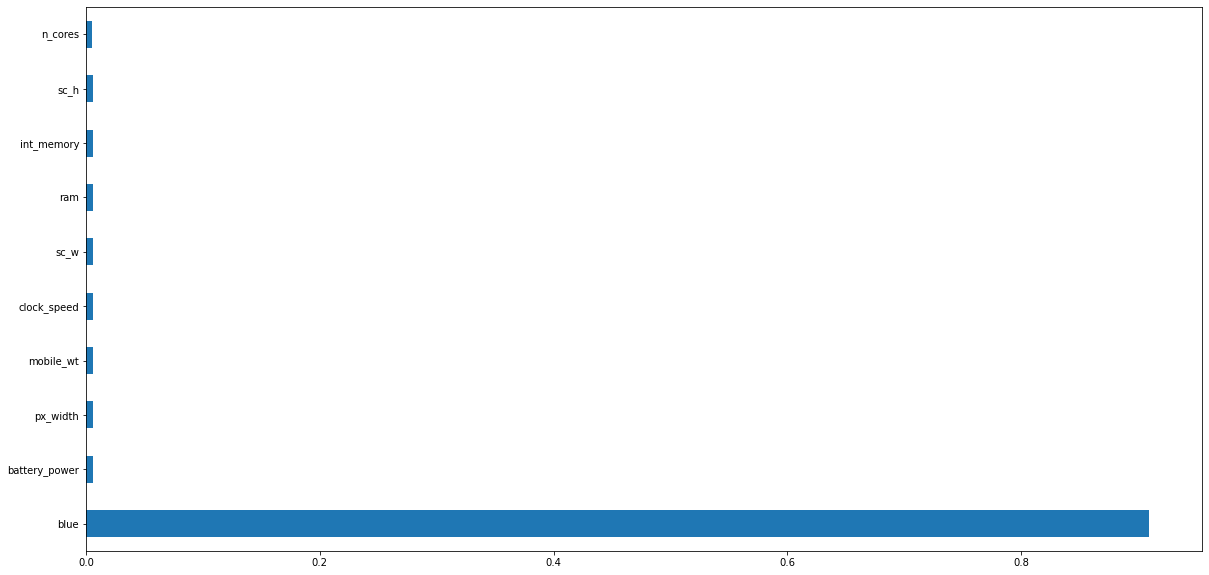

In [10]:
# plot graph of feature importance for better visualization

plt.figure(figsize=(20,10))
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()